# Cat and Dog Classification using SVM

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
from skimage.io import imread
from skimage.transform import resize

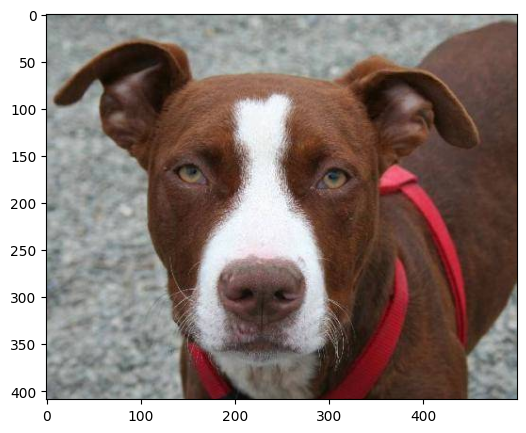

In [ ]:
plt.figure(figsize=(10,5))
img1 = r"C:\Users\DELL\Desktop\prodigy\dogs-vs-cats\test_set\test_set\dogs\dog.4126.jpg"
plt.imshow(imread(img1))

In [ ]:
img_path = r"C:\Users\DELL\Desktop\prodigy\dogs-vs-cats\test_set\test_set\dogs\dog.4126.jpg"
img = imread(img_path)
img

array([[[119, 131, 129],
        [122, 134, 132],
        [125, 137, 135],
        ...,
        [164, 169, 172],
        [167, 172, 175],
        [170, 175, 178]],

       [[122, 134, 132],
        [125, 137, 135],
        [128, 140, 138],
        ...,
        [165, 171, 171],
        [167, 172, 175],
        [169, 175, 175]],

       [[126, 136, 135],
        [129, 139, 138],
        [132, 142, 141],
        ...,
        [165, 171, 169],
        [165, 171, 171],
        [166, 172, 170]],

       ...,

       [[128, 131, 136],
        [129, 132, 137],
        [131, 134, 139],
        ...,
        [124, 145, 150],
        [127, 146, 152],
        [127, 148, 153]],

       [[134, 137, 142],
        [136, 139, 144],
        [138, 141, 146],
        ...,
        [122, 142, 149],
        [123, 143, 150],
        [124, 144, 151]],

       [[144, 147, 152],
        [142, 145, 150],
        [139, 142, 147],
        ...,
        [127, 147, 156],
        [126, 146, 155],
        [125, 145, 154]]

In [7]:
img.shape

(409, 500, 3)

In [9]:
img_resize = resize(img, (15,15))
img_resize.shape

(15, 15, 3)

In [11]:
img_resize

array([[[0.56087723, 0.58729179, 0.58190041],
        [0.55878592, 0.57567713, 0.57016053],
        [0.55565088, 0.56051633, 0.54819195],
        [0.55903102, 0.56675038, 0.55093607],
        [0.59509544, 0.6150707 , 0.60679087],
        [0.60015125, 0.62602159, 0.61578465],
        [0.61570151, 0.64017025, 0.63028739],
        [0.59914049, 0.61962076, 0.6090338 ],
        [0.62010362, 0.64323679, 0.63927234],
        [0.63356271, 0.65641809, 0.65194241],
        [0.61268956, 0.63336971, 0.62634259],
        [0.61989093, 0.63780342, 0.63196006],
        [0.61093774, 0.61666997, 0.60739137],
        [0.56119865, 0.52724205, 0.50492475],
        [0.49429892, 0.42846998, 0.40103873]],

       [[0.58055637, 0.60595274, 0.59484926],
        [0.4840171 , 0.46420597, 0.43383738],
        [0.29814299, 0.24878284, 0.21177463],
        [0.30669155, 0.24701063, 0.20723565],
        [0.51373977, 0.47648766, 0.44747533],
        [0.63128809, 0.64497396, 0.63577562],
        [0.63885995, 0.65669667,

In [13]:
flatten_img = img_resize.flatten()
flatten_img

array([0.56087723, 0.58729179, 0.58190041, 0.55878592, 0.57567713,
       0.57016053, 0.55565088, 0.56051633, 0.54819195, 0.55903102,
       0.56675038, 0.55093607, 0.59509544, 0.6150707 , 0.60679087,
       0.60015125, 0.62602159, 0.61578465, 0.61570151, 0.64017025,
       0.63028739, 0.59914049, 0.61962076, 0.6090338 , 0.62010362,
       0.64323679, 0.63927234, 0.63356271, 0.65641809, 0.65194241,
       0.61268956, 0.63336971, 0.62634259, 0.61989093, 0.63780342,
       0.63196006, 0.61093774, 0.61666997, 0.60739137, 0.56119865,
       0.52724205, 0.50492475, 0.49429892, 0.42846998, 0.40103873,
       0.58055637, 0.60595274, 0.59484926, 0.4840171 , 0.46420597,
       0.43383738, 0.29814299, 0.24878284, 0.21177463, 0.30669155,
       0.24701063, 0.20723565, 0.51373977, 0.47648766, 0.44747533,
       0.63128809, 0.64497396, 0.63577562, 0.63885995, 0.65669667,
       0.64364858, 0.63365468, 0.65325055, 0.64069168, 0.63792038,
       0.65998351, 0.64940841, 0.62513348, 0.63219117, 0.61319

In [15]:
flatten_img.shape

(675,)

In [ ]:
input_dir = r"C:\Users\DELL\Desktop\prodigy\Task 3\dogs-vs-cats\test_set\test_set"
categories = ['cats', 'dogs']
data = []
labels = []
for category_idx, category in enumerate(categories):
    for file in os.listdir(os.path.join(input_dir, category)):
        img_path = os.path.join(input_dir, category, file)
        print(img_path)
        img = imread(img_path)
        img = resize(img, (15,15))
        data.append(img.flatten())
        labels.append(category_idx)    

C:\Users\Shreyash Musmade\Desktop\prodigy\Task 3\dogs-vs-cats\test_set\test_set\cats\cat.4001.jpg
C:\Users\Shreyash Musmade\Desktop\prodigy\Task 3\dogs-vs-cats\test_set\test_set\cats\cat.4002.jpg
C:\Users\Shreyash Musmade\Desktop\prodigy\Task 3\dogs-vs-cats\test_set\test_set\cats\cat.4003.jpg
C:\Users\Shreyash Musmade\Desktop\prodigy\Task 3\dogs-vs-cats\test_set\test_set\cats\cat.4004.jpg
C:\Users\Shreyash Musmade\Desktop\prodigy\Task 3\dogs-vs-cats\test_set\test_set\cats\cat.4005.jpg
C:\Users\Shreyash Musmade\Desktop\prodigy\Task 3\dogs-vs-cats\test_set\test_set\cats\cat.4006.jpg
C:\Users\Shreyash Musmade\Desktop\prodigy\Task 3\dogs-vs-cats\test_set\test_set\cats\cat.4007.jpg
C:\Users\Shreyash Musmade\Desktop\prodigy\Task 3\dogs-vs-cats\test_set\test_set\cats\cat.4008.jpg
C:\Users\Shreyash Musmade\Desktop\prodigy\Task 3\dogs-vs-cats\test_set\test_set\cats\cat.4009.jpg
C:\Users\Shreyash Musmade\Desktop\prodigy\Task 3\dogs-vs-cats\test_set\test_set\cats\cat.4010.jpg
C:\Users\Shreyash Mu

In [18]:
data[1]

array([0.49455332, 0.47327465, 0.41579835, 0.45960165, 0.43884834,
       0.38972562, 0.41084784, 0.39092072, 0.34617174, 0.3628795 ,
       0.34705993, 0.29736049, 0.33822314, 0.32095534, 0.26825516,
       0.31766447, 0.29872341, 0.2486088 , 0.34199951, 0.30726556,
       0.23351812, 0.32740655, 0.29093812, 0.21316026, 0.36551905,
       0.30683014, 0.19713855, 0.39916555, 0.31345704, 0.20236217,
       0.28833835, 0.17949345, 0.1104213 , 0.25334435, 0.11283439,
       0.06173506, 0.31074502, 0.12356083, 0.06305852, 0.38028219,
       0.14828401, 0.06444084, 0.43458703, 0.17870038, 0.07178485,
       0.45322278, 0.4360103 , 0.39156084, 0.3172875 , 0.29101513,
       0.24941391, 0.33613407, 0.30697625, 0.26116193, 0.33128587,
       0.28081434, 0.22738559, 0.30031112, 0.22825628, 0.1657873 ,
       0.29802613, 0.22460842, 0.16432392, 0.31045938, 0.2362979 ,
       0.1713315 , 0.31252053, 0.24393091, 0.17853141, 0.32775265,
       0.2300237 , 0.15846611, 0.35289422, 0.1910449 , 0.10535

In [31]:
labels[1]

np.int64(0)

In [21]:
data = np.asarray(data)
labels = np.asarray(labels)

In [23]:
data

array([[0.46717939, 0.58898388, 0.64124616, ..., 0.51179056, 0.57388877,
        0.6087126 ],
       [0.49455332, 0.47327465, 0.41579835, ..., 0.40116611, 0.17388368,
        0.07268538],
       [0.19569579, 0.17964409, 0.14638953, ..., 0.57304762, 0.50764377,
        0.48233354],
       ...,
       [0.47520526, 0.40143693, 0.33460227, ..., 0.50796179, 0.45401545,
        0.39586824],
       [0.54860723, 0.54893046, 0.54503866, ..., 0.59786659, 0.62639173,
        0.60671373],
       [0.95148604, 0.95150613, 0.94981646, ..., 0.10356239, 0.10356728,
        0.09573501]], shape=(2023, 675))

In [25]:
labels

array([0, 0, 0, ..., 1, 1, 1], shape=(2023,))

In [27]:
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True, stratify=labels)

# Built SVM Model for classification

In [32]:
from sklearn.svm import SVC
svm_model = SVC()

### Model Training

In [35]:
svm_model.fit(x_train, y_train)

SVC()

In [37]:
y_pred = svm_model.predict(x_test)
y_pred

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,

In [39]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
score

0.6320987654320988

In [41]:
from sklearn.model_selection import cross_val_score
cross_val_score = cross_val_score(svm_model, data, labels, cv = 5)
cross_val_score

array([0.58518519, 0.60987654, 0.64444444, 0.66336634, 0.64356436])

In [43]:
Mean_Accuracy = cross_val_score.mean()
Mean_Accuracy

np.float64(0.6292873731817626)

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.58      0.61       202
           1       0.62      0.68      0.65       203

    accuracy                           0.63       405
   macro avg       0.63      0.63      0.63       405
weighted avg       0.63      0.63      0.63       405



In [47]:
from sklearn.model_selection import GridSearchCV

In [50]:
classifer = SVC()
parameters = [{'gamma':[0.01, 0.001, 0.0001], 'C':[10, 100, 1000]}]
grid_search = GridSearchCV(classifer, parameters)
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}])

In [52]:
best_estimator = grid_search.best_estimator_
best_estimator

SVC(C=10, gamma=0.01)

In [54]:
y_prediction = best_estimator.predict(x_test)
y_prediction

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,

# Classify the Image

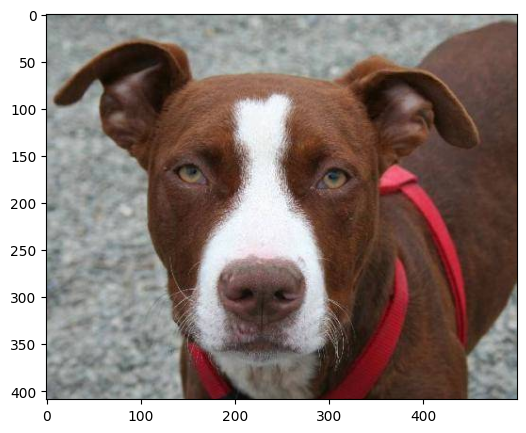

In [ ]:
plt.figure(figsize=(10, 5))
img_path = r"C:\Users\DELL\Desktop\prodigy\test_set\test_set\dogs\dog.5000.jpg"
plt.imshow(imread(img1))

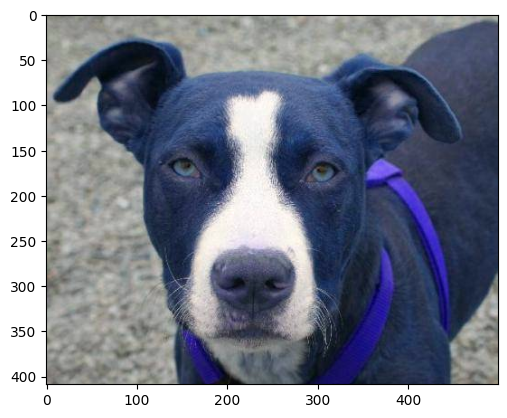

In [61]:
import cv2 as cv
img_path = cv.imread(img1)
plt.imshow(img_path)

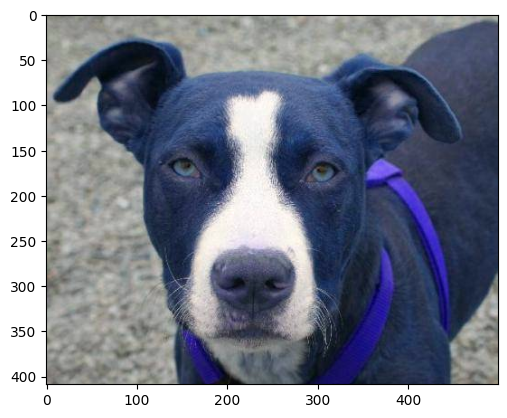

In [ ]:
img_dog = r"C:\Users\DELL\Desktop\prodigy\Task 3\dogs-vs-cats\test_set\test_set\dogs\dog.4126.jpg"
img_path = cv.imread(img_dog)
plt.imshow(img_path)

In [ ]:
img_dog = r"C:\Users\DELL\Desktop\prodigy\Task 3\dogs-vs-cats\test_set\test_set\dogs\dog.4126.jpg"
img_new = imread(img_dog)
img_new1 = resize(img_new, (15,15))
img_flatten = img_new1.flatten()
img_array = np.asarray(img_flatten)

result = svm_model.predict(img_array.reshape(1, -1))

if result[0] == 1:
    print("Result =", result[0])
    print("It is a dog.")
else:
    print("It is a cat.")

Result = 1
It is a dog.


In [73]:
def image_classification_prediction(image):
    img_new = imread(image)
    img_new1 = resize(img_new, (15,15))
    img_flatten = img_new1.flatten()
    img_array = np.asarray(img_flatten)
    result = svm_model.predict(img_array.reshape(1, -1))
    img_path = cv.imread(image)
    plt.imshow(img_path)
    if result[0] == 1:
        print("Result =", result[0])
        return "It is a dog"
    else:
        return "IT is a cat"
        

Result = 1


'It is a dog'

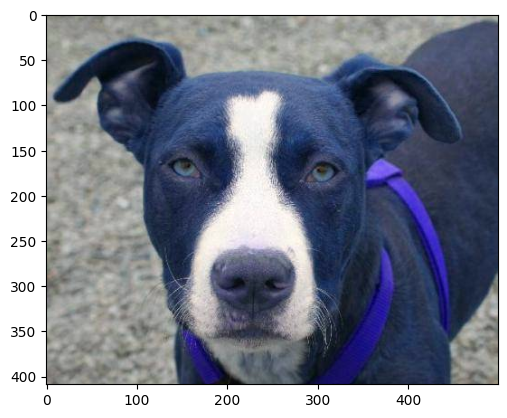

In [ ]:
img2 = r"C:\Users\DELL\Desktop\prodigy\Task 3\dogs-vs-cats\test_set\test_set\dogs\dog.4126.jpg"
image_classification_prediction(img2)

'IT is a cat'

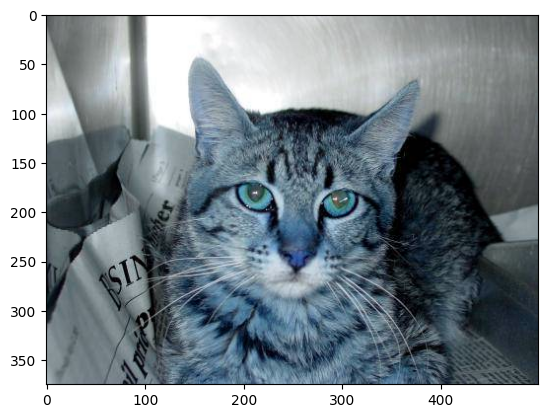

In [ ]:
img3 = r"C:\Users\DELL\Desktop\prodigy\Task 3\dogs-vs-cats\test_set\test_set\cats\cat.4102.jpg"
image_classification_prediction(img3)